## **Stacking**

Stacking, or stacked generalization, is an advanced ensemble learning technique that combines the strengths of multiple base models (predictors) using a meta-model (blender) to optimize the final prediction.

#### **How stacking works?**

1) **Base Models:**
    - Train several diverse base models on the training data (e.g., decision trees, linear regression, support vector machines, etc.).
    - These models are selected based on their strengths and complementary characteristics.
2) **Generate Predictions:**
    - Each base model predicts outcomes for the training set (via cross-validation to prevent overfitting) and the test set.
    - These predictions form a new dataset: the meta-features.
3) **Meta-Model (Blender):**
    - Train a meta-model (e.g., logistic regression, random forest, or any other algorithm) on the meta-features generated by the base models.
    - The meta-model learns how to combine the base model predictions to produce the final output.
4) **Final Prediction:**
    - For new data, the base models make predictions, and these predictions are fed into the meta-model to produce the final result.

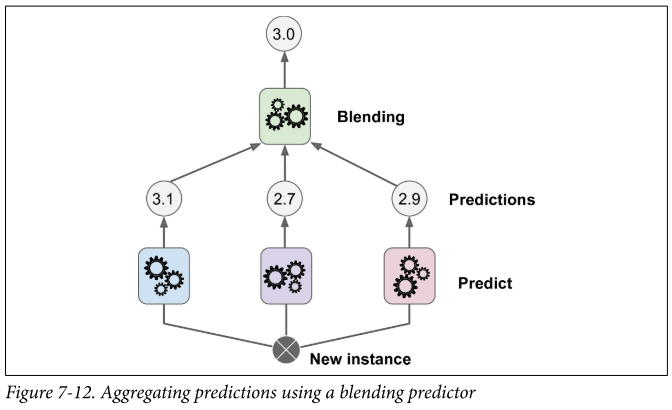

#### **Applications**

Stacking is widely used in:
- Kaggle competitions, where ensemble methods are key to achieving top scores.
- Domains like finance, healthcare, and recommendation systems, where improving prediction accuracy is critical.

#### **Step-by-Step Explanation**

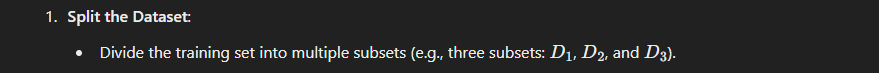
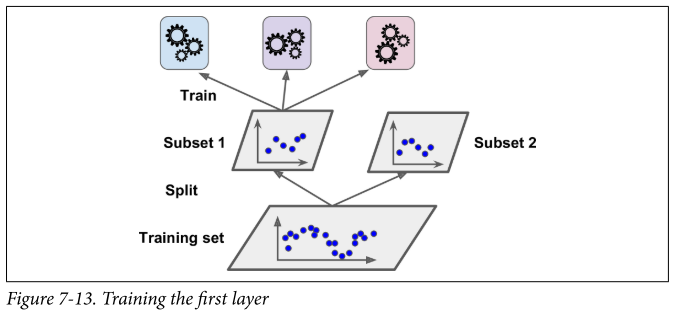
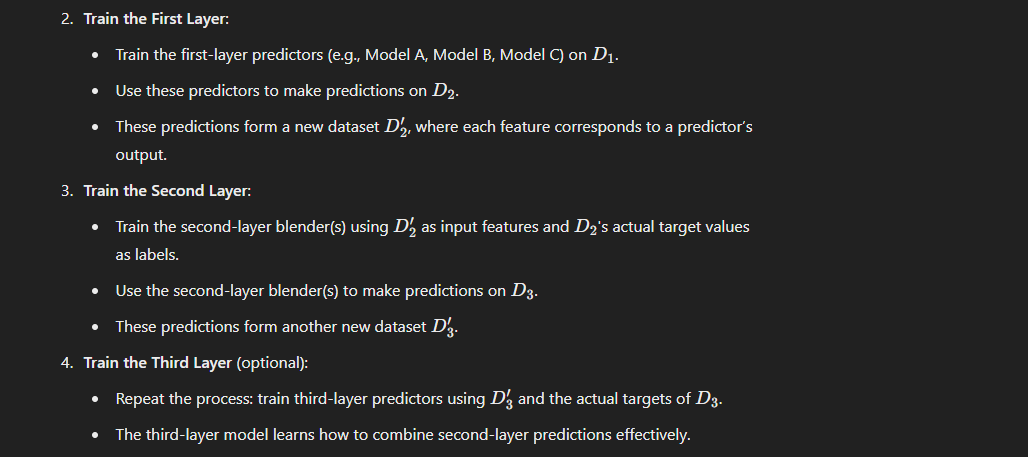
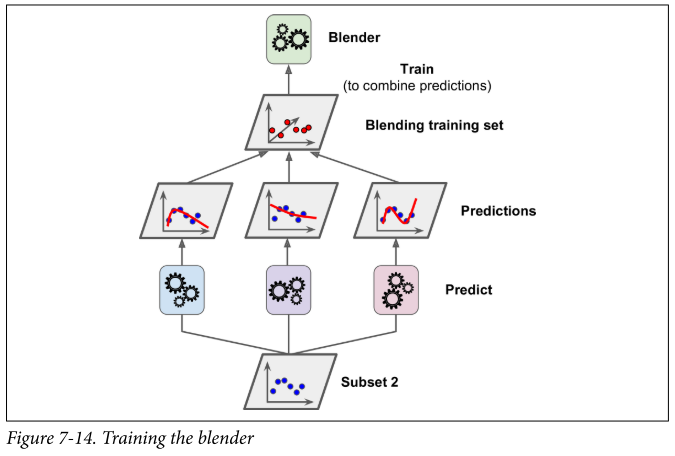
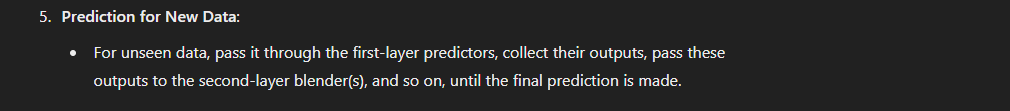
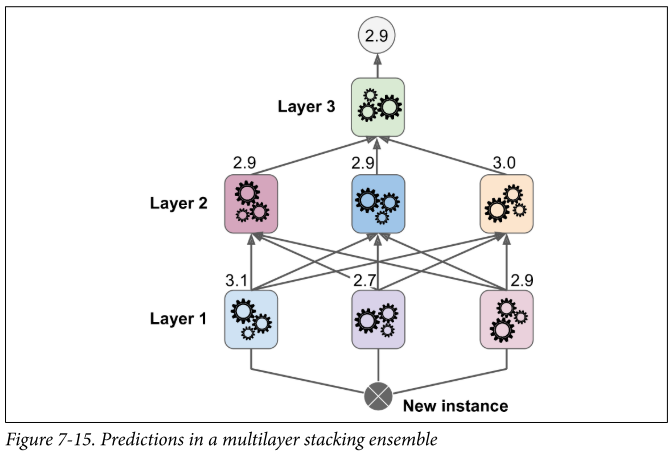

Unfortunately, Scikit-Learn does not support stacking directly, but it is not too hard to roll out your own implementation (see the following exercises). Alternatively, you can use an open source implementation such as brew (available at https://github.com/viisar/brew).

#### **Advantages of Multi-Layer Stacking**

- **Improved Prediction Power:** Each layer refines the predictions of the previous layer.
- **Model Diversity:** Each layer can use different types of models, enhancing robustness.
- **Flexibility:** Works for both regression and classification tasks.


#### **Challenges**

- **Overfitting:** With many layers, there’s a risk of overfitting, especially if the dataset is small.
- **Complexity:** Training multiple layers and managing data splits can be computationally intensive.
- **Data Requirements:** Requires sufficient data to split into multiple subsets while retaining representativeness.

#### **Code**

from sklearn.model_selection import train_test_split<br>
from sklearn.linear_model import LinearRegression<br>
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor<br>
from sklearn.metrics import mean_squared_error<br>
import numpy as np<br>
<br>
#Example dataset<br>
X, y = ...  # Feature matrix and target vector<br>
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=42)<br>
<br>
#First layer models<br>
model_a = LinearRegression()<br>
model_b = RandomForestRegressor()<br>
model_c = GradientBoostingRegressor()<br>
<br>
model_a.fit(X_train, y_train)<br>
model_b.fit(X_train, y_train)<br>
model_c.fit(X_train, y_train)<br>
<br>
#Predictions on hold-out set<br>
pred_a = model_a.predict(X_holdout)<br>
pred_b = model_b.predict(X_holdout)<br>
pred_c = model_c.predict(X_holdout)<br>
<br>
#Combine predictions<br>
meta_features = np.vstack((pred_a, pred_b, pred_c)).T<br>
<br>
#Blender (second layer)<br>
blender = LinearRegression()<br>
blender.fit(meta_features, y_holdout)<br>
<br>
#Test on new data<br>
new_data = ...  # New unseen instances<br>
first_layer_preds = np.vstack((<br>
    model_a.predict(new_data),<br>
    model_b.predict(new_data),<br>
    model_c.predict(new_data)<br>
))<br>
final_prediction = blender.predict(first_layer_preds)<br>
